Kd Fitting
===

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from champ import intensity_array, seqtools
from champ.kd import KdFitIA
import matplotlib.pyplot as plt
import numpy as np
import os
import random
from IPython.display import HTML

In [3]:
custom_results_dir = 'results'
custom_fig_dir = 'figs'
inten_array_fpath = 'results/LDA_intensity_scores.txt'

## Setup

In [4]:
def mm_name(seq):
    mms = []
    for i, (c1, c2) in enumerate(zip(kdf.target, seq)):
        if c1 != c2:
            pos = i + 1 - 3
            if pos <= 0:
                pos -= 1
            mms.append('{}{}{}'.format(c1, pos, c2))
    return ','.join(mms)

In [5]:
IA = intensity_array.IntensityArray()
IA.parse_intensities_file(inten_array_fpath)
new_concentration_list = [conc for conc in IA.course_trait_list[1:]]
IA = IA.subIA(course_traits=new_concentration_list)

In [6]:
print(IA.course_trait_list)

[500.0, 1000.0, 2000.0, 4000.0, 8000.0, 16000.0, 32000.0, 64000.0, 128000.0, 256000.0, 512000.0]


In [7]:
single_ham_seqs = seqtools.get_mismatch_seqs(IA.target, 1)
single_deletion_seqs = seqtools.get_deletion_seqs(IA.target, 1)
single_insertion_seqs = seqtools.get_insertion_seqs(IA.target, 1)

In [8]:
sinham_IA = IA.subIA(seqs=single_ham_seqs)
del_IA = IA.subIA(seqs=single_deletion_seqs)
ins_IA = IA.subIA(seqs=single_insertion_seqs)

## Just Single Hamming Dist

In [9]:
kdf = KdFitIA(sinham_IA)
kdf.find_Imin_and_background_noise()
kdf.find_Imax()

In [10]:
print(kdf.nM_concentrations)

[0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0, 512.0]


/mnt/marble/hdd/home/jim/champ/champ/kd.py:350: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  ax.set_axis_bgcolor('white')
/mnt/marble/hdd/home/jim/champ/champ/kd.py:369: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  ax.set_axis_bgcolor('white')


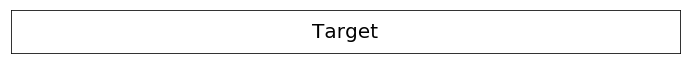

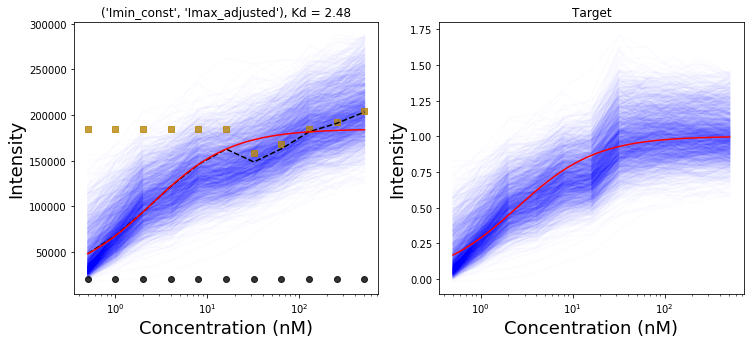

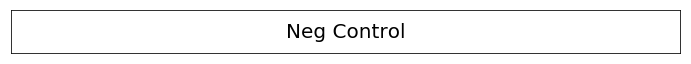

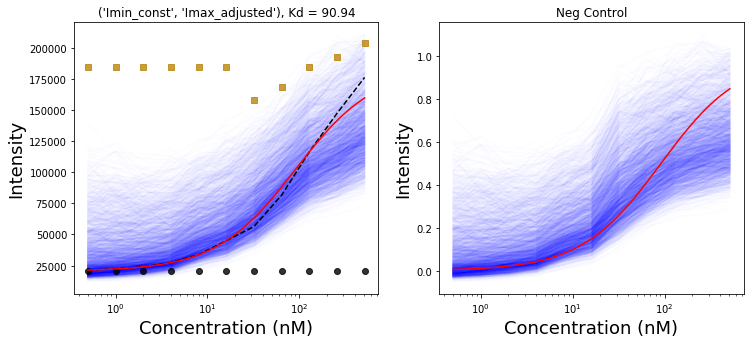

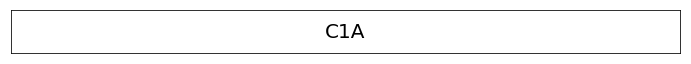

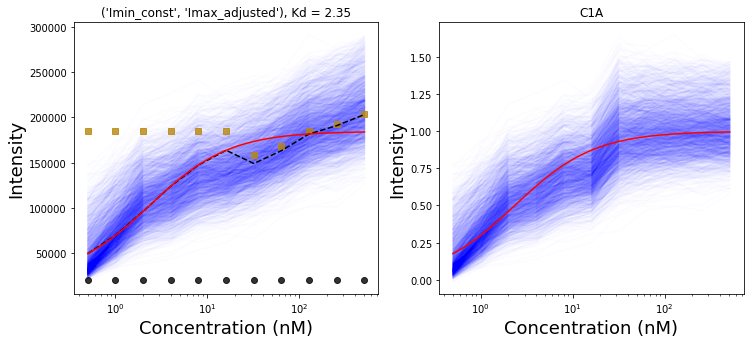

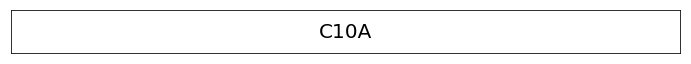

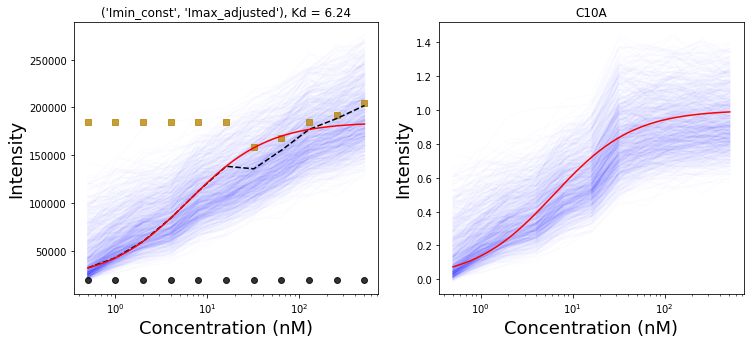

In [11]:
example_seqs = [kdf.target, kdf.neg_control_target] + random.sample(single_ham_seqs, 2)
labels = ['Target', 'Neg Control'] + map(mm_name, example_seqs[2:])
kdf.example_plots(example_seqs, labels)

In [12]:
kdf.fit_all_Kds()

83 Seqs, '.'=100


('Imin_const', 'Imax_adjusted')
.

In [13]:
kdf.write_results(custom_results_dir, 'LDA_sinham')

## Error Analysis

('Imin_const', 'Imax_adjusted')
.................................................................................................


/mnt/marble/hdd/home/jim/champ/champ/kd.py:475: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  ax.set_axis_bgcolor('white')


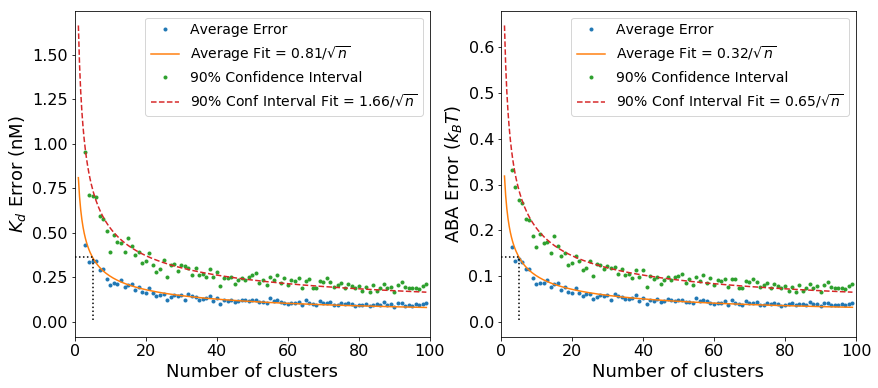

In [14]:
kdf.all_error_analysis_and_figs(out_dir=custom_fig_dir, out_bname='LDA')

## All Seqs

In [15]:
kdf = KdFitIA(IA)
kdf.find_Imin_and_background_noise()
kdf.find_Imax()

In [16]:
kdf.fit_all_Kds()

12429 Seqs, '.'=100


('Imin_const', 'Imax_adjusted')
.............................................................................................................................

In [17]:
kdf.write_results(custom_results_dir, 'LDA')